<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/PCA_full_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [52]:
cancer=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [53]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)

In [54]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [55]:
features=cancer.drop(columns='Unnamed: 32')

In [57]:
le=LabelEncoder()
cancer['diagnosis']=le.fit_transform(cancer.diagnosis)
y=cancer['diagnosis']

In [58]:
features=cancer.drop(columns=['Unnamed: 32','diagnosis'])

In [59]:
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [60]:
pca.components_[:,0].shape

(31,)

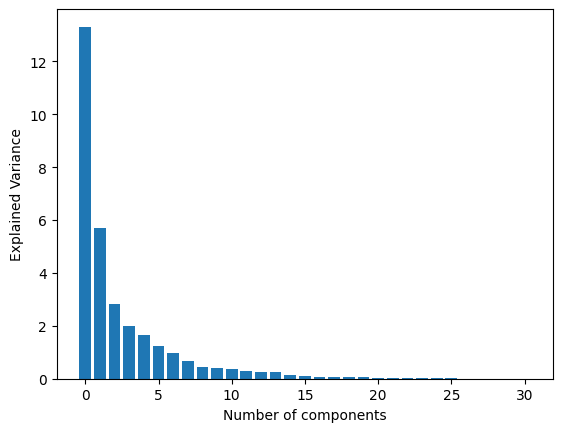

In [61]:
feat=range(pca.n_components_)
explained_variance=pca.explained_variance_
fig,ax=plt.subplots()
ax.bar(x=feat,height=explained_variance)
ax.set_xlabel('Number of components')
ax.set_ylabel('Explained Variance')
plt.show()

In [62]:
pca=PCA(n_components=5)
scaler=StandardScaler()
pipeline=make_pipeline(scaler,pca)
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5))])

In [63]:
transformed=pipeline.transform(features)

In [64]:
X=pd.DataFrame(transformed,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt=DecisionTreeClassifier(max_depth=5)

In [68]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [70]:
y_pred=dt.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [74]:
cancer.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64